### Notebook is for a learning activity

In [1]:
import pandas as pd 
import numpy as np 
import scipy as scp

In [2]:
train = pd.read_csv("/kaggle/input/poker-rule-induction/train.csv.zip")

train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [3]:
test = pd.read_csv("/kaggle/input/poker-rule-induction/test.csv.zip")

test.head()

,id,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,10,2,2,3,3,3,8,1,1
1,2,2,13,3,5,3,7,4,6,1,4
2,3,1,3,1,11,2,8,2,1,2,4
3,4,1,6,3,3,4,7,1,8,3,11
4,5,2,10,3,4,1,6,2,12,2,6


In [4]:
df = train
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  hand    25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [6]:
df.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


array([[<Axes: title={'center': 'S1'}>, <Axes: title={'center': 'C1'}>,
        <Axes: title={'center': 'S2'}>],
       [<Axes: title={'center': 'C2'}>, <Axes: title={'center': 'S3'}>,
        <Axes: title={'center': 'C3'}>],
       [<Axes: title={'center': 'S4'}>, <Axes: title={'center': 'C4'}>,
        <Axes: title={'center': 'S5'}>],
       [<Axes: title={'center': 'C5'}>, <Axes: title={'center': 'hand'}>,
        <Axes: >]], dtype=object)

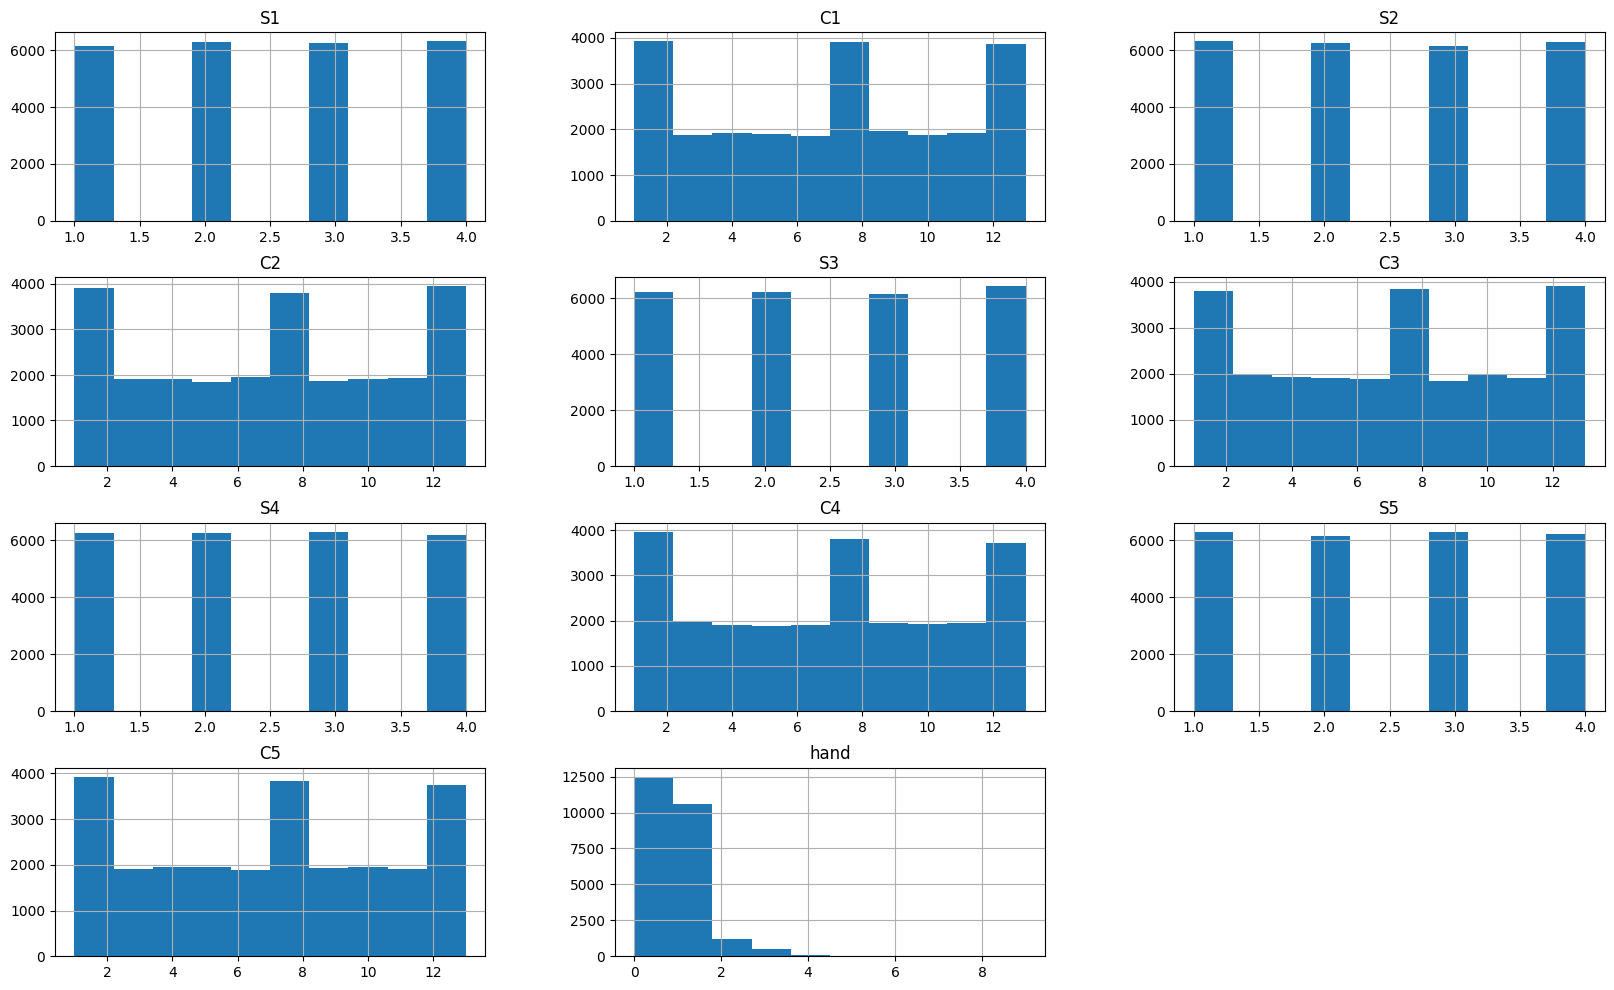

In [7]:
df.hist(figsize=(20,12))

In [8]:
df['hand'].value_counts()

hand
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: count, dtype: int64

In [29]:
def preprocessing(df):
    df['min_flush'] = (df['S1']==df['S2'])&(df['S2']==df['S3'])&(df['S3']==df['S4'])&(df['S4']==df['S5'])
    
    a1 = df[['C1','C2','C3','C4','C5']].min(axis = 1)
    b1 = 5*a1 + 10
    a2 = df[['C1','C2','C3','C4','C5']].max(axis = 1).apply(scp.special.factorial)
    
    b2 = (df[['C1','C2','C3','C4','C5']].min(axis = 1) -1).apply(scp.special.factorial)
    
    c = a2/b2
    
    df['min_straight'] = ((df['C1']*df['C2']*df['C3']*df['C4']*df['C5'] == c) & 
                         (df['C1'] + df['C2'] + df['C3'] + df['C4'] + df['C5'] == b1)) | ( (df[['C1','C2','C3','C4','C5']].min(axis = 1) == 1) & (df['C1']*df['C2']*df['C3']*df['C4']*df['C5'] == 17160))
    
    df['min_straight_flush'] = df['min_flush'] & df['min_straight']
    
    df['RF'] = df[df['min_straight_flush'] == True][['C1','C2','C3','C4','C5']].sum(axis = 1) == 47
    
    df['RF'] = df['RF'].fillna(False)
    
    df['straight_flush'] = (df['min_straight_flush'] == True) & (df['RF'] == False)
    
    df['straight_flush'] = df['straight_flush'].fillna(False)
    
    df = df.drop('min_straight_flush', axis = 1)
    df['flush'] = (df['straight_flush'] == False) & (df['min_flush'] == True) & (df['RF'] == False)
    
    df['straight'] = (df['straight_flush'] == False) & (df['min_straight'] == True) & (df['RF'] == False)
    
    df = df.drop('min_straight', axis = 1)
    df = df.drop('min_flush', axis = 1)
    
    df['flush'] = df['flush'].fillna(False)
    df['straight'] = df['straight'].fillna(False)
    df['nothing_in_hand'] = (df[['C1','C2','C3','C4','C5']].nunique(axis = 1) == 5) & (df['straight'] == False) & (df['flush'] == False) & (df['RF'] == False) & (df['straight_flush'] == False)
    
    df['nothing_in_hand'] = df['nothing_in_hand'].fillna(False)
    
    # check
    df['One_pair'] = (df[['C1', 'C2', 'C3', 'C4', 'C5']].nunique(axis =1) == 4)
    df['One_pair'] = df['One_pair'].fillna(False)
    df['Four of a kind or Full house'] = df[['C1', 'C2', 'C3', 'C4', 'C5']].nunique(axis =1) == 2
    df['Two pairs or Three of a kind'] = df[['C1', 'C2', 'C3', 'C4', 'C5']].nunique(axis =1) == 3
    df['Four of a kind or Full house'] = df['Four of a kind or Full house'].fillna(False)
    df['Two pairs or Three of a kind'] = df['Two pairs or Three of a kind'].fillna(False)
    dff = np.array(df[['C1', 'C2', 'C3', 'C4', 'C5']])
    a = []
    for i in range(dff.shape[0]):
        u, v  = np.unique(dff[i], return_counts=True)
        a.append(4 in v)
    df['Four of a kind'] = np.array(a)
    df['Full house'] = (df['Four of a kind']==False) & (df['Four of a kind or Full house'] ==True)
    df = df.drop('Four of a kind or Full house', axis =1)
    a = []
    for i in range(dff.shape[0]):
        u, v  = np.unique(dff[i], return_counts=True)
        a.append(set(v) == set([1,1,3]))
    df['Three of a kind'] = np.array(a)
    df['Two pairs'] = (df['Three of a kind']==False) & (df['Two pairs or Three of a kind'] ==True)
    df = df.drop('Two pairs or Three of a kind', axis =1)
    df = df.drop(['S1', 'S2','S3','S4','S5','C1','C2','C3','C4','C5'], axis = 1)
    return df

In [30]:
df.head(20)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand,min_flush,min_straight,min_straight_flush,RF,straight_flush
0,4,9,2,1,2,2,4,7,2,8,0,False,False,False,False,False
1,1,4,3,6,1,12,3,11,2,7,0,False,False,False,False,False
2,1,11,4,1,3,7,4,11,2,1,2,False,False,False,False,False
3,2,9,2,4,3,6,1,9,4,9,3,False,False,False,False,False
4,1,8,2,4,2,11,2,2,2,1,0,False,False,False,False,False
5,2,5,1,5,2,13,2,3,3,13,2,False,False,False,False,False
6,3,10,4,6,1,4,2,13,4,5,0,False,False,False,False,False
7,4,10,3,1,2,13,4,2,4,7,0,False,False,False,False,False
8,3,2,4,10,3,3,4,4,1,9,0,False,False,False,False,False
9,2,7,3,8,4,8,2,13,2,12,1,False,False,False,False,False


In [31]:
df = preprocessing(df)
df.head(20)

,hand,RF,straight_flush,flush,straight,nothing_in_hand,One_pair,Four of a kind,Full house,Three of a kind,Two pairs
0,0,False,False,False,False,True,False,False,False,False,False
1,0,False,False,False,False,True,False,False,False,False,False
2,2,False,False,False,False,False,False,False,False,False,True
3,3,False,False,False,False,False,False,False,False,True,False
4,0,False,False,False,False,True,False,False,False,False,False
5,2,False,False,False,False,False,False,False,False,False,True
6,0,False,False,False,False,True,False,False,False,False,False
7,0,False,False,False,False,True,False,False,False,False,False
8,0,False,False,False,False,True,False,False,False,False,False
9,1,False,False,False,False,False,True,False,False,False,False


In [35]:
X = df.drop('hand', axis = 1)
y = df['hand']
X = np.array(X).astype(int)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X,y)
X_test = test.drop('id', axis = 1)
X_test = preprocessing(X_test)

In [37]:
X_test = np.array(X_test).astype(int)
predictions = rfc.predict(X_test).astype(int)
output = pd.DataFrame({'id' : test.id,
                      'hand': predictions})

In [38]:
output.to_csv("results.csv", index = False)
print("File saved")
output

File saved


,id,hand
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
999995,999996,1
999996,999997,1
999997,999998,1
999998,999999,0
